<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜: 2022-06-23
* 이름: 고민수

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [60]:
import set_matplotlib_hangul

Hangul OK in your window!


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

#### 레이어 생성

In [9]:
class LinearLayer():
    # 학습 파라미터(W, b)의 shape 결정
    
    def __init__(self, d_in, d_out):
        W_shape = (d_in, d_out)
        b_shape = (d_out)
        
        # 행렬 만들기
        self.W = np.random.normal(0,1, W_shape)
        self.b = np.zeros(b_shape)
        
    def forward(self, X):
        # X : (n_samplt, d_in)
        return X@self.W+self.b

In [10]:
layer1 = LinearLayer(d_in=3, d_out=3)
layer2 = LinearLayer(d_in=3, d_out=2)

In [12]:
print(layer1.W)
print(layer1.b)
print(layer2.W)
print(layer2.b)

[[ 0.96452957  1.14036847 -0.58313924]
 [ 1.11189977  1.25338332 -1.40095918]
 [-1.24933063  0.61925558  0.49753878]]
[0. 0. 0.]
[[ 0.61084053  1.34576794]
 [-0.4424866  -0.91790266]
 [ 1.78390624  0.53765666]]
[0. 0.]


In [13]:
X = np.array( [[1,2,1]])
print(X, X.shape)

[[1 2 1]] (1, 3)


In [14]:
print(layer1.forward(X))

[[ 1.93899848  4.26639069 -2.88751882]]


In [15]:
print(layer2.forward(layer1.forward(X)))

[[-5.85446471 -2.8591831 ]]


#### 모델 생성

In [37]:
class Model():
    
    # 모델의 레이어 정의
    def __init__(self):
        self.layer1 = LinearLayer(d_in=3, d_out=3)
        self.layer2 = LinearLayer(d_in=3, d_out=2)
    
    # 예측 - forward(순전파 계산)
    def predict(self, x):
        z = self.layer1.forward(x)
        y = self.layer2.forward(z)
        return y
    
    # 학습 파라미터 반환
    def get_weights(self):
        return [ self.layer1.W, self.layer1.b, self.layer2.W, self.layer2.b]
    
    # 학습 파라미터를 직접 입력
    def set_weights(self, **kwargs):
        self.layer1.W = kwargs.get("layer1_W")
        self.layer1.b = kwargs.get("layer1_b")
        self.layer2.W = kwargs.get("layer2_W")
        self.layer2.b = kwargs.get("layer2_b")

In [38]:
model = Model()
model.predict(X)

array([[-1.74015298, -1.23165546]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [39]:
X = np.array( [ 1,2,1]).reshape(1,3)
W1_ = np.array( [ 1,1,-1,1,0.5,-1,1,1,1]).reshape(3,3)
b1_ = np.array([0,0,0]).reshape(1,3)
W2_=np.array( [1, 0.5, -1, 0.5,0,1]).reshape(3,2)
b2_ = np.array([1,-0.5]).reshape(1,2)

print(X.shape)
print(W1_.shape)
print(b1_.shape)
print(W2_.shape)
print(b2_.shape)

(1, 3)
(3, 3)
(1, 3)
(3, 2)
(1, 2)


* 학습 파라미터 확인

In [40]:
model.get_weights()

[array([[-0.07407022,  0.37370441,  1.28319591],
        [-2.19041644,  0.07864523, -0.39413996],
        [ 2.45192384, -0.28999385, -0.03959844]]),
 array([0., 0., 0.]),
 array([[ 0.89840578,  0.59700957],
        [-0.86701122,  1.05739189],
        [ 0.58922782, -0.63843398]]),
 array([0., 0.])]

* 학습 파라미터 세팅

In [41]:
model.set_weights(layer1_W=W1_, layer1_b=b1_, layer2_W=W2_, layer2_b =b2_)

In [42]:
model.get_weights()

[array([[ 1. ,  1. , -1. ],
        [ 1. ,  0.5, -1. ],
        [ 1. ,  1. ,  1. ]]),
 array([[0, 0, 0]]),
 array([[ 1. ,  0.5],
        [-1. ,  0.5],
        [ 0. ,  1. ]]),
 array([[ 1. , -0.5]])]

* 예측 (순전파)

In [45]:
model.predict(X)

array([[2., 1.]])

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

    * ----- 마지막 층에서 사용 -----
        - Step Function -- 예외 ( 최근에는 사용하지 않음 ) 
        - Sigmoid : Binary 클래스
        - Softmax : 클래스가 3개 이상 

    * ----- 중간 층에서 사용 -----
        - Tanh :
        - ReLU : 
        - Leaky ReLU :
        - PReLU :
        - ELU :
    


* 시각화를 위한 플롯팅 함수

In [109]:
def plot_func(xs, ys, label, title=''):
    plt.figure(figsize=(8,4))
    plt.plot(xs, ys, label=label)
    plt.title(title)
    plt.ylim(-1, 2)
    plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
    plt.grid()
    plt.legend()

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [ ]:
# 함수의 인풋 , 0차 텐서, 아웃풋 0차 텐서
def sigmoid(x):
    return 1/(1+np.exp(-x))

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [55]:
def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

* 시각화

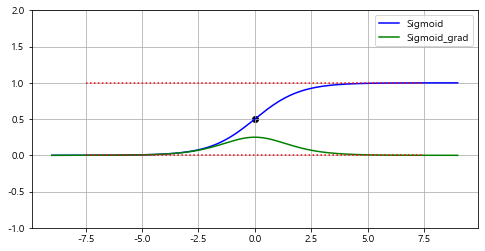

In [123]:
xs = np.linspace(-9,9, 500)
plt.figure(figsize=(8,4))
plt.plot(xs, sigmoid(xs), label="Sigmoid", color="blue")
plt.plot(xs, sigmoid_grad(xs), label="Sigmoid_grad", color="green")
plt.hlines(xmin=-7.5, xmax=7.5, y=0, colors='r', linestyles=':')
plt.hlines(xmin=-7.5, xmax=7.5, y=1, colors='r', linestyles=':')
plt.scatter(0,0.5, color="black")
plt.ylim(-1, 2)
plt.grid()
plt.legend()
plt.show;



**Sigmoid 소개**

```
- 나오게 된 배경 : 실수전체를 정의역으로 단조함수(0또는 1)을 표현하기 위함

- 특징 정리 (출력 범위, 미분 값 등)
    - exp(x)를 사용한다.
        - 계산량이 많다.
    - 함수값의 범위가 (0,1) 로 제한된다.
    - 중심값이 0.5이다.
        - 0~1 사이 범위에서 중심값이 0.5로 모든 x 값이 양수이다.
        - 또한 모든 미분값이 양수값을 가진다.
        - 이러한 경우에서 update 를 하는 과정에서 zigzag 를 하는 형상을 보이며 최적화 시간을 늘리는 원인이 된다.
    - 미분값이 사라진다.
        - x=0에서 1/4 의 값을 가지고 |x| 값이 일정이상 커지면 미분값이 소실된다.
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [67]:
def softmax(xx):
    exx = np.exp(xx) 
    sum_exx = np.sum(exx) 
    return exx / sum_exx 

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [74]:
def softmax_grad(xs, j=0):
    return (softmax(xs)*(1-softmax(xs)))[j]

* 시각화


<AxesSubplot:>

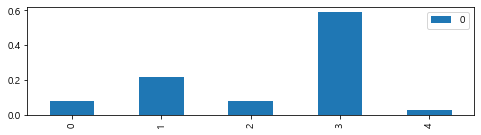

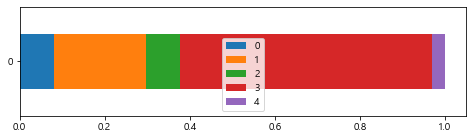

In [104]:
ys = softmax(np.array( [1, 2, 1, 3, 0]))
pd.DataFrame(ys).plot(kind="bar")
pd.DataFrame([ys]).plot(kind="barh", stacked=True)


**Softmax 소개**

```
- # 나오게 된 배경 : 다중 클래스 분류에 사용되는 활성화 함수
- # 장단점 
- # 특징 정리 (출력 범위, 미분 값 등 )
    - Sotfmax만 적용하면 회귀값을 얻을 수 있다.
    - 클래스 별 확률값(회귀값)을 얻는다.
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [105]:
def hypertan(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [106]:
def hypertan_grad(x):
    return 1-hypertan(x)**2

* 시각화

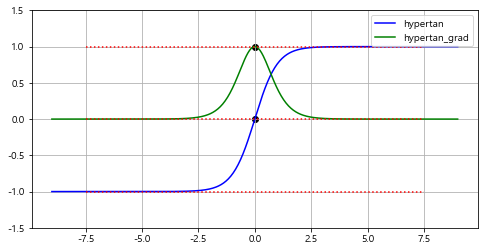

In [127]:
xs = np.linspace(-9,9, 500)
plt.figure(figsize=(8,4))
plt.plot(xs, hypertan(xs), label="hypertan", color="blue")
plt.plot(xs, hypertan_grad(xs), label="hypertan_grad", color="green")
plt.hlines(xmin=-7.5, xmax=7.5, y=0, colors='r', linestyles=':')
plt.hlines(xmin=-7.5, xmax=7.5, y=1, colors='r', linestyles=':')
plt.hlines(xmin=-7.5, xmax=7.5, y=-1, colors='r', linestyles=':')
plt.scatter(0,1, color="black")
plt.scatter(0,0, color="black")
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend()
plt.show;


**Tanh 소개**

```
- # 나오게 된 배경 : Sigmoid 의 단점을 개선

- # 특징 정리 (출력 범위, 미분 값 등 )
    - 중심값을 0 으로 옮겨졌다.
        - Sigmoid 의 최적화 과정이 느려지는 것을 보완
    - 미분값이 여전히 일정이상 값에서 소실된다.
    - 여전히 exp(x)의 계산이 필요하다.
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

In [158]:
def ReLU(x):
    return np.maximum(0,x)

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [145]:
def ReLU_grad(x):
    return np.where(x>=0 , 1, 0)

* 시각화

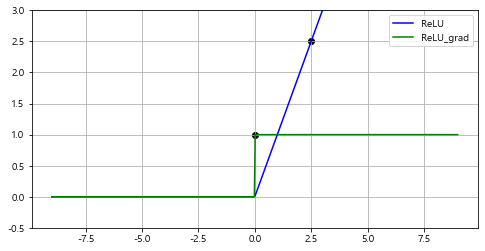

In [164]:
xs = np.linspace(-9,9, 500)
plt.figure(figsize=(8,4))
plt.plot(xs, ReLU(xs), label="ReLU", color="blue")
plt.plot(xs, ReLU_grad(xs), label="ReLU_grad", color="green")
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.ylim(-0.5, 3)
plt.grid()
plt.legend()
plt.show;



**ReLU 소개**

```
- # 나오게 된 배경 : Sigmoid 의 느린 계산속도 계선

- # 특징 정리 (출력 범위, 미분 값 등 )
    - 함수가 단순해지고 Sigmoid 에 비해 계산속도가 월등히 빠르다.
    - x < 0 에서 미분값이 0 이다.
        - 뉴련이 더이상 update 하지 않고 "죽는" 경우가 있음
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

In [165]:
def PReLU(x, alpha=0.01):
    return np.maximum(alpha*x, x)

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [166]:
def PReLU_grad(x, alpha=0.01):
    return np.where(x>=0, 1, alpha)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

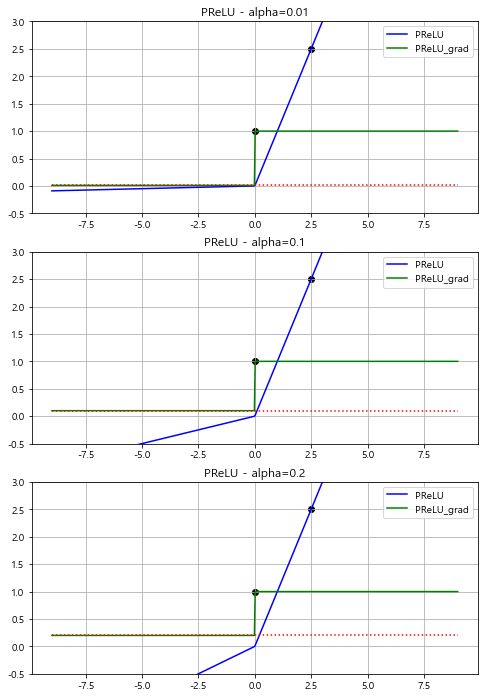

In [176]:
xs = np.linspace(-9,9, 500)
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.plot(xs, PReLU(xs, alpha=0.01), label="PReLU", color="blue")
plt.plot(xs, PReLU_grad(xs, alpha=0.01), label="PReLU_grad", color="green")
plt.title("PReLU - alpha=0.01")
plt.hlines(xmin=-9, xmax=9, y=0.01, colors='r', linestyles=':')
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.ylim(-0.5, 3)
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(xs, PReLU(xs, alpha=0.1), label="PReLU", color="blue")
plt.plot(xs, PReLU_grad(xs, alpha=0.1), label="PReLU_grad", color="green")
plt.title("PReLU - alpha=0.1")
plt.hlines(xmin=-9, xmax=9, y=0.1, colors='r', linestyles=':')
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.ylim(-0.5, 3)
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(xs, PReLU(xs, alpha=0.2), label="PReLU", color="blue")
plt.plot(xs, PReLU_grad(xs, alpha=0.2), label="PReLU_grad", color="green")
plt.hlines(xmin=-9.0, xmax=9.0, y=0.2, colors='r', linestyles=':')
plt.title("PReLU - alpha=0.2")
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.ylim(-0.5, 3)
plt.grid()
plt.legend()
plt.show;



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경 : ReLU 의 X<0 에서 뉴런이 죽는것을 방지

- # 특징 정리 (출력 범위, 미분 값 등 )
    - X<0 에서 미분값이 0.01, α 값을 가진다.
- # 알파 값은 보통 어떻게 정해지는가?
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [178]:
def SELU(x, alpha=1):
    return np.where(x>=0, x, alpha*(np.exp(x)-1))

* 미분

\begin{align}
\frac{x}{dx} SELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [179]:
def SELU_grad(x, alpha=1):
    return np.where(x>=0, 1, alpha*(np.exp(x)))

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

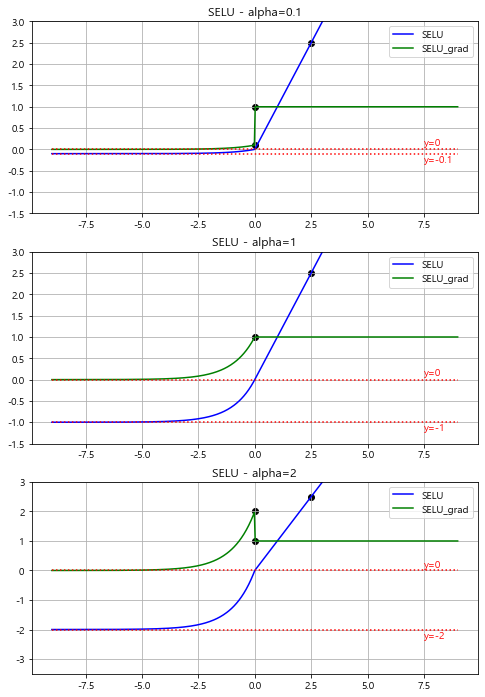

In [197]:
xs = np.linspace(-9,9, 500)
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.plot(xs, SELU(xs, alpha=0.1), label="SELU", color="blue")
plt.plot(xs, SELU_grad(xs, alpha=0.1), label="SELU_grad", color="green")
plt.title("SELU - alpha=0.1")
plt.hlines(xmin=-9, xmax=9, y=0, colors='r', linestyles=':')
plt.hlines(xmin=-9, xmax=9, y=-0.1, colors='r', linestyles=':')
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.scatter(0,0.1, color="black")
plt.text(7.5, 0.1, "y=0",color="red")
plt.text(7.5, -0.3, "y=-0.1",color="red")
plt.ylim(-1.5, 3)
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(xs, SELU(xs, alpha=1), label="SELU", color="blue")
plt.plot(xs, SELU_grad(xs, alpha=1), label="SELU_grad", color="green")
plt.title("SELU - alpha=1")
plt.hlines(xmin=-9, xmax=9, y=0, colors='r', linestyles=':')
plt.hlines(xmin=-9, xmax=9, y=-1, colors='r', linestyles=':')
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.text(7.5, 0.1, "y=0",color="red")
plt.text(7.5, -1.2, "y=-1",color="red")
plt.ylim(-1.5, 3)
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(xs, SELU(xs, alpha=2), label="SELU", color="blue")
plt.plot(xs, SELU_grad(xs, alpha=2), label="SELU_grad", color="green")
plt.title("SELU - alpha=2")
plt.hlines(xmin=-9, xmax=9, y=0, colors='r', linestyles=':')
plt.hlines(xmin=-9, xmax=9, y=-2, colors='r', linestyles=':')
plt.text(7.5, 0.1, "y=0",color="red")
plt.text(7.5, -2.3, "y=-2",color="red")
plt.scatter(0,1, color="black")
plt.scatter(2.5,2.5, color="black")
plt.scatter(0,2, color="black")
plt.ylim(-3.5, 3)
plt.grid()
plt.legend()
plt.show;



**ELU 및 SeLU 소개**

```
- # 나오게 된 배경 : ReRU 의 미분 소실문제 해결, PReRU 보다 뛰어난 일반화 성능
- # 특징 정리 (출력 범위, 미분 값 등 )
    - ReLU 의 모든 장점을 가진다
    - ReLU 가 죽는 문제를 보완하였다.
    - 출력값이 거의 zero-centered 하다.
    - exp(x) 계산으로 계산량이 증가하였다.
    - 레이어가 많아졌을때 일반화 성능이 좋아짐
- # 알파 값은 보통 어떻게 정해지는가?
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```


```